# Gaussian Mixture Models

## K-Means
1. Associate clusters with the centers.
2. Assigned each example to exactly one cluster.
3. Used euclidean distance(works good with spherical clusters)

![clustering](../Images/km_good.png)

## What if...
1. The cluster has a non-spherical shape?
2. Clusters are overlapping?

![clustering](../Images/overlap_.png)

### Let's generate some "spacial" data 

In [2]:
from scipy.stats import multivariate_normal
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

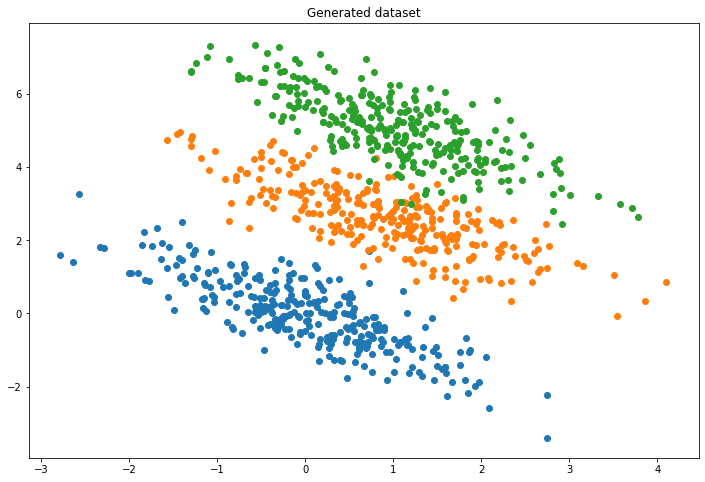

In [3]:
mean1 = np.array([0,0])
cov1 = np.array([[1,-0.8],[-0.8,1]])

mean2 = np.array([1,2.5])
cov2 = np.array([[1,-0.8],[-0.8,1]])

mean3 = np.array([1,5])
cov3 = np.array([[1,-0.8],[-0.8,1]])

n = 300 
np.random.seed(42)

x1, y1 = np.random.multivariate_normal(mean1, cov1, n).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, n).T
x3, y3 = np.random.multivariate_normal(mean3, cov3, n).T

x = np.concatenate((x1,x2,x3)).reshape(-1,1)
y = np.concatenate((y1,y2,y3)).reshape(-1,1)
X = np.concatenate((x,y),axis=1)

plt.figure(figsize=(12,8))
plt.title("Generated dataset")
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3);

## Let's fit K-means and see the predicted clusters

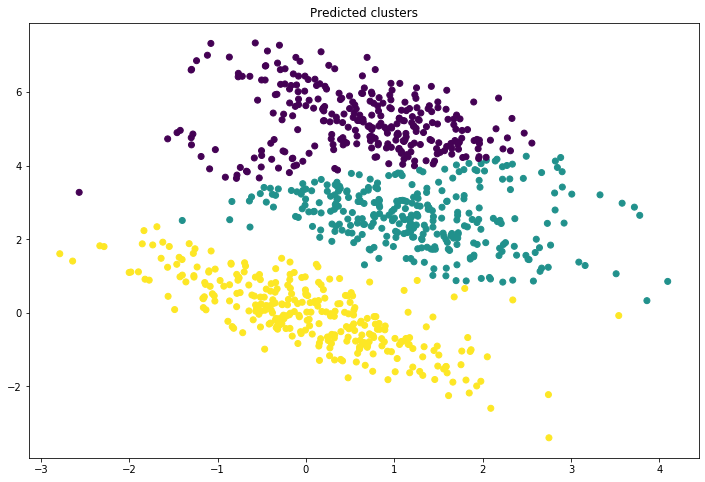

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

y_pred = kmeans.predict(X)
plt.figure(figsize=(12,8))
plt.title("Predicted clusters")
plt.scatter(X[:,0],X[:,1],c=y_pred);

#### K-Means fails, becouse clusters has a non-spherical shapes

## Multivariate Gaussian Distribution

### Definition 

![clustering](../Images/mult_normal.png)

where
<br><br>
$x \in R^{d} $
<br><br>
$\mu \in R^{d} $ — mean
<br><br>
$\Sigma \in R^{d*d}$ — covariance matrix


![clustering](../Images/mult_norm_plot.png)

### Examples

In [5]:
def plot_mult_normal(mean,cov,n=1000):
    
    fig = plt.figure(figsize=(20,8))
    rv = multivariate_normal(mean, cov)
    


    # First subplot
    ax = fig.add_subplot(1, 3, 1)
    x, y = np.random.multivariate_normal(mean, cov, n).T
    ax.scatter(x,y)

    ax = fig.add_subplot(1, 3, 2)

    x_lin = np.linspace(x.min(),x.max(),500)
    y_lin = np.linspace(y.min(),y.max(),500)
    X,Y = np.meshgrid(x_lin,y_lin)
    
    pos = np.array([X.flatten(),Y.flatten()]).T
    ax.contour(rv.pdf(pos).reshape(500,500))
    
    # Second subplot
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y    
    Z = rv.pdf(pos)
    surf = ax.plot_surface(X, Y, Z, cmap='viridis',linewidth=0)
    plt.show()
    


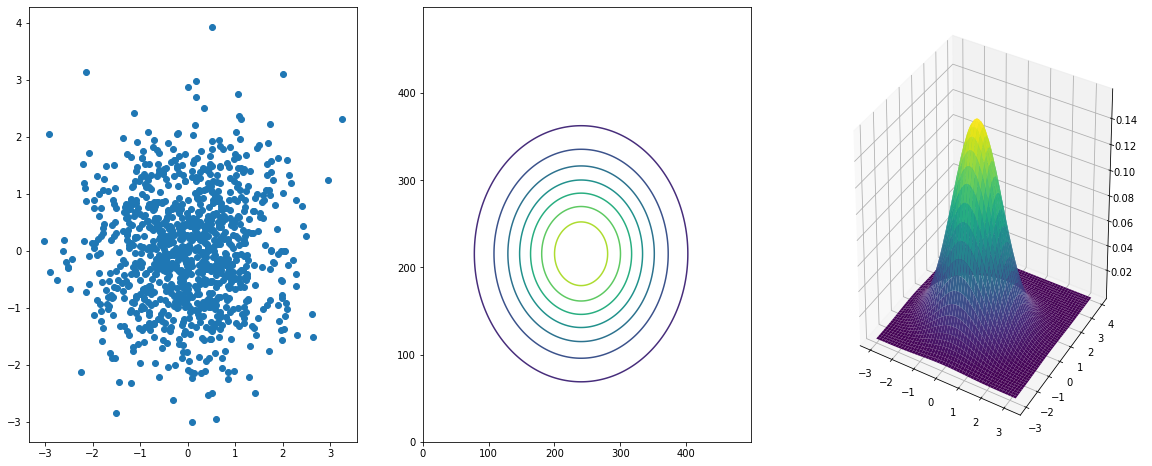

In [6]:
mean = np.array([0,0])
cov = np.array([[1,0],
                [0,1]])
plot_mult_normal(mean,cov)

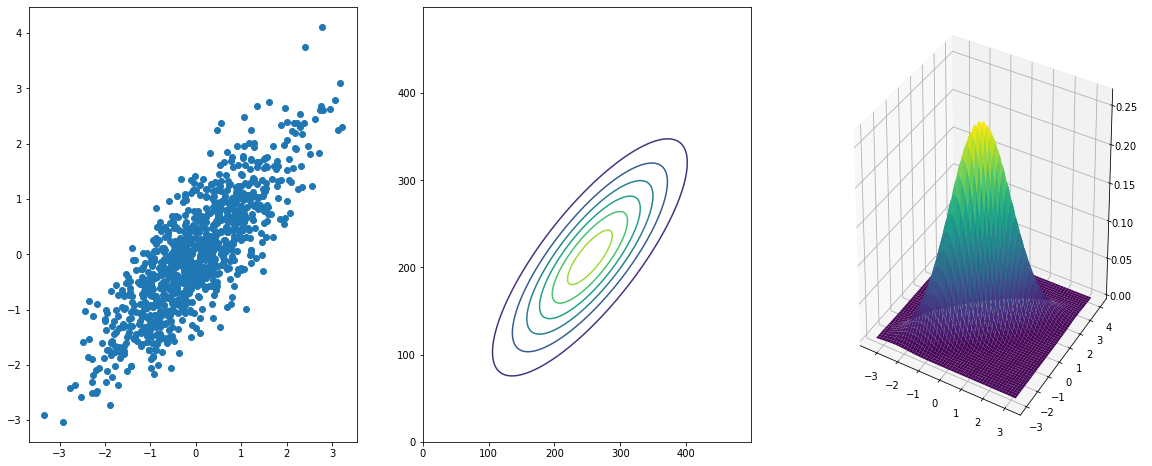

In [12]:
mean = np.array([0,0])
cov = np.array([[1,0.8],
                [0.8,1]])
plot_mult_normal(mean,cov)

more: https://www.youtube.com/watch?v=JjB58InuTqM

### Maximum Likelihood Estimators

![clustering](../Images/mle_est.png)

## Mixtures of Gaussians

### Definitions


![clustering](../Images/mixt_def.png)

where the parameters $\{\pi_{k}\}$ must satisfy
$0 \leq  \pi_{k} \leq 1$ and $\sum_{k=1}^{K}\pi_{k} = 1$ 

### Examples

![clustering](../Images/1d_ex.png)

![clustering](../Images/3d_ex.gif)

Let us introduce a K-dimensional binary random variable $z$ having a 1-of-K representation in which a particular element $z_{k}$ is equal to 1 and all other elements are equal to 0. The values of $z_{k}$ therefore satisfy $z_{k} \in \{0, 1\}$ and  $\sum_{z}z_{k} = 1$ , and we see that there are K possible states for the vector z according to which element is nonzero. 

We shall define the joint distribution $p(x, z)$ in terms of a marginal distribution $p(z)$ and a conditional distribution $p(x|z)$, 


$$ p(x,z) = p(z)p(x|z).$$

The marginal distribution over z is specified in terms of the
mixing coefficients $\{\pi_{k}\}$ , such that

$$ p(z_{k} = 1) = \pi_{k} $$

\begin{equation}
p(\mathbf{z})=\prod_{k=1}^{K} \pi_{k}^{z_{k}}
\end{equation}

Similarly, the conditional distribution of $x$ given a particular value for $z$ is a Gaussian

\begin{equation}
p\left(\mathbf{x} | z_{k}=1\right)=\mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
\end{equation}


\begin{equation}
p(\mathbf{x} | \mathbf{z})=\prod_{k=1}^{K} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)^{z_{k}}
\end{equation}

The joint distribution is given by $p(z)p(x|z)$, and the marginal distribution of $x$ is then obtained by summing the joint distribution over all possible states of $z$. to give
\begin{equation}
p(\mathbf{x})=\sum_{\mathbf{z}} p(\mathbf{z}) p(\mathbf{x} | \mathbf{z})=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
\end{equation}

Another quantity that will play an important role is the conditional probability
of $z$ given $x$. We shall use $\gamma(z_{k})$ to denote $p(z_{k} = 1|x)$, whose value can be found
using Bayes’ theorem

\begin{equation}
\begin{aligned}
\gamma\left(z_{k}\right) \equiv p\left(z_{k}=1 | \mathbf{x}\right) &=\frac{p\left(z_{k}=1\right) p\left(\mathbf{x} | z_{k}=1\right)}{\sum_{j=1}^{K} p\left(z_{j}=1\right) p\left(\mathbf{x} | z_{j}=1\right)} \\
&=\frac{\pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \boldsymbol{\Sigma}_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{j}, \boldsymbol{\Sigma}_{j}\right)}
\end{aligned}
\end{equation}

## Maximum likelihood

Suppose we have a data set $ ( x_{1},..., x_{N} ) $ consisting
of N observations of a random D-dimensional Euclidean variable $x$.

$$ X= 
\begin{bmatrix}
x_{11} & x_{11} & \cdots & x_{1d}  \\
x_{21} & x_{22} & \cdots & x_{2d} \\
x_{n1} & x_{n2} & \cdots & x_{nd} 
\end{bmatrix}
$$ 

Similarly, the corresponding latent variables will be denoted by an N × K matrix $Z$ with rows $z^T_{n}$.
<br><br>
Then, log-likelihood is 
\begin{equation}
\ln p(\mathbf{X} | \boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma})=\sum_{n=1}^{N} \ln \left\{\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{k}, \boldsymbol{\Sigma}_{k}\right)\right\}
\end{equation}

## Expectation-Maximization(EM)

An elegant and powerful method for finding maximum likelihood solutions for
models with latent variables is called the expectation-maximization algorithm, or EM
algorithm (Dempster et al., 1977; McLachlan and Krishnan, 1997)

Setting the derivatives of ln $p(X|\pi, \mu, \Sigma)$  with
respect to the means $\mu_{k}$ of the Gaussian components to zero, we obtain

![clustering](../Images/log_mu.png)

\begin{equation}
\boldsymbol{\mu}_{k}=\frac{1}{N_{k}} \sum_{n=1}^{N} \gamma\left(z_{n k}\right) \mathbf{x}_{n}
\end{equation}
where we have defined

\begin{equation}
N_{k}=\sum_{n=1}^{N} \gamma\left(z_{n k}\right)
\end{equation}

If we set the derivative of $p(X|\pi, \mu, \Sigma)$ with respect to $\Sigma_{k}$ to zero, we obtain

\begin{equation}
\boldsymbol{\Sigma}_{k}=\frac{1}{N_{k}} \sum_{n=1}^{N} \gamma\left(z_{n k}\right)\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}\right)\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}\right)^{\mathrm{T}}
\end{equation}

Finally, we maximize $p(X|\pi, \mu, \Sigma)$ with respect to the mixing coefficients $\pi_{k}$.

\begin{equation}
\pi_{k}=\frac{N_{k}}{N}
\end{equation}

## EM for Gaussian Mixtures

1. Initialize the means $µ_{k}$, covariances $\Sigma_{k}$ and mixing coefficients $\pi_{k}$, and
    evaluate the initial value of the log likelihood.
2. E step. Evaluate the responsibilities using the current parameter values.
\begin{equation}
\gamma\left(z_{n k}\right)=\frac{\pi_{k} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{j}, \mathbf{\Sigma}_{j}\right)}
\end{equation}

3. M step. Re-estimate the parameters using the current responsibilities.

\begin{equation}
\begin{aligned}
\boldsymbol{\mu}_{k}^{\text {new }} &=\frac{1}{N_{k}} \sum_{n=1}^{N} \gamma\left(z_{n k}\right) \mathbf{x}_{n} \\
\boldsymbol{\Sigma}_{k}^{\text {new }} &=\frac{1}{N_{k}} \sum_{n=1}^{N} \gamma\left(z_{n k}\right)\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}^{\text {new }}\right)\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}^{\text {new }}\right)^{\mathrm{T}} \\
\pi_{k}^{\text {new }} &=\frac{N_{k}}{N}
\end{aligned}
\end{equation}
\begin{equation}
N_{k}=\sum_{n=1}^{N} \gamma\left(z_{n k}\right)
\end{equation}

4. Evaluate the log likelihood

\begin{equation}
\ln p(\mathbf{X} | \boldsymbol{\mu}, \boldsymbol{\Sigma}, \boldsymbol{\pi})=\sum_{n=1}^{N} \ln \left\{\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{k}, \boldsymbol{\Sigma}_{k}\right)\right\}
\end{equation}

![clustering](../Images/gmm_out.png)

### REFERANCES

Bishop:Pattern Recognition and Machine Learning(9.2. Mixtures of Gaussians)

https://www.youtube.com/watch?v=iQoXFmbXRJA

https://www.youtube.com/watch?v=qMTuMa86NzU